<a href="https://colab.research.google.com/github/MahdiNouraie/RNN-and-Transformers/blob/main/Darts_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyyaml==5.4.1

In [ ]:
!pip install darts

In [ ]:
import darts

In [ ]:
import darts.utils.timeseries_generation as tg
from darts.models import RNNModel
from darts.utils.likelihood_models import GaussianLikelihood

In [ ]:
signal_length = 400
signal_trend = tg.linear_timeseries(length = signal_length , end_value = 4)
signal_trend

<TimeSeries (DataArray) (time: 400, component: 1, sample: 1)>
array([[[0.        ]],

       [[0.01002506]],

       [[0.02005013]],

       [[0.03007519]],

       [[0.04010025]],

       [[0.05012531]],

       [[0.06015038]],

       [[0.07017544]],

       [[0.0802005 ]],

       [[0.09022556]],

...

       [[3.90977444]],

       [[3.9197995 ]],

       [[3.92982456]],

       [[3.93984962]],

       [[3.94987469]],

       [[3.95989975]],

       [[3.96992481]],

       [[3.97994987]],

       [[3.98997494]],

       [[4.        ]]])
Coordinates:
  * time       (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2001-02-03
  * component  (component) object 'linear'
Dimensions without coordinates: sample

In [ ]:
signal_trend.all_values()

array([[[0.        ]],

       [[0.01002506]],

       [[0.02005013]],

       [[0.03007519]],

       [[0.04010025]],

       [[0.05012531]],

       [[0.06015038]],

       [[0.07017544]],

       [[0.0802005 ]],

       [[0.09022556]],

       [[0.10025063]],

       [[0.11027569]],

       [[0.12030075]],

       [[0.13032581]],

       [[0.14035088]],

       [[0.15037594]],

       [[0.160401  ]],

       [[0.17042607]],

       [[0.18045113]],

       [[0.19047619]],

       [[0.20050125]],

       [[0.21052632]],

       [[0.22055138]],

       [[0.23057644]],

       [[0.2406015 ]],

       [[0.25062657]],

       [[0.26065163]],

       [[0.27067669]],

       [[0.28070175]],

       [[0.29072682]],

       [[0.30075188]],

       [[0.31077694]],

       [[0.32080201]],

       [[0.33082707]],

       [[0.34085213]],

       [[0.35087719]],

       [[0.36090226]],

       [[0.37092732]],

       [[0.38095238]],

       [[0.39097744]],

       [[0.40100251]],

       [[0.41102

In [ ]:
signal_trend.all_values().shape

(400, 1, 1)

In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

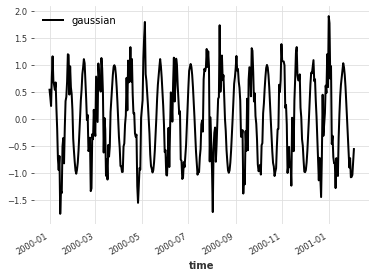

In [ ]:
signal_length = 400
signal_trend = tg.linear_timeseries(length = signal_length , end_value = 4)
sine_signal = tg.sine_timeseries(length = signal_length , 
                     value_frequency = 0.05,
                     value_amplitude = 1.0)
noise = tg.gaussian_timeseries(length = signal_length , std = 0.5)
noise_sine =(tg.sine_timeseries(length = signal_length , value_frequency=0.02) +
                  tg.constant_timeseries(length = signal_length , value = 1)) / 2
noise = noise * noise_sine
target_series = sum([noise , sine_signal])
target_series.plot()

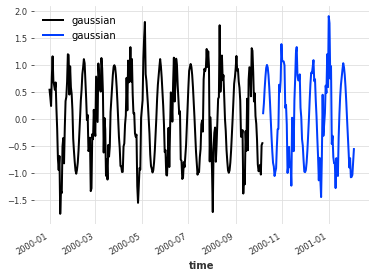

In [ ]:
target_train, target_val = target_series.split_after(0.7)
target_train.plot()
target_val.plot()

In [ ]:
rnn_model  = RNNModel(
    model = 'LSTM',
    hidden_dim = 50,
    n_rnn_layers = 2,
    dropout = 0,
    n_epochs = 100,
    optimizer_kwargs = {'lr' : 1e-3},
    input_chunk_length = 20,
    training_length = 50,
    likelihood = GaussianLikelihood()
)

In [ ]:
rnn_model.fit(target_train)

[2022-06-20 11:56:35,899] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 230 samples.
[2022-06-20 11:56:35,899] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 230 samples.
2022-06-20 11:56:35 darts.models.forecasting.torch_forecasting_model INFO: Train dataset contains 230 samples.
[2022-06-20 11:56:35,944] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-06-20 11:56:35,944] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
2022-06-20 11:56:35 darts.models.forecasting.torch_forecasting_model INFO: Time series values are 64-bits; casting model to float64.
2022-06-20 11:56:35 pytorch_lightning.utilities.rank_zero INFO: GPU available: True, used: False
2022-06-20 11:56:35 pytorch_lightning.utilities.rank_zero INFO: TPU available: False, using: 0 TPU cores
2022-06-20 11:56:35 pytorch_li

Training: 0it [00:00, ?it/s]

In [ ]:
rnn_model.predict(50 , num_samples = 50)

Predicting: 8it [00:00, ?it/s]

<TimeSeries (DataArray) (time: 50, component: 1, sample: 50)>
array([[[0.19119538, 0.189279  , 0.26025115, ..., 0.20357923,
         0.22093308, 0.17780902]],

       [[0.38520082, 0.29777493, 0.3272751 , ..., 0.34160937,
         0.44832547, 0.33900144]],

       [[0.51108893, 0.6290811 , 0.68149301, ..., 0.70949694,
         0.45669201, 0.60010278]],

       ...,

       [[0.77875126, 0.87157884, 0.8476381 , ..., 0.87772051,
         0.85738922, 0.81655655]],

       [[0.68629681, 0.59190346, 0.66711152, ..., 0.68431433,
         0.66810506, 0.55310446]],

       [[0.46140309, 0.09222389, 0.13187945, ..., 0.25238705,
         0.37601797, 0.29209977]]])
Coordinates:
  * time       (time) datetime64[ns] 2000-10-07 2000-10-08 ... 2000-11-25
  * component  (component) object 'gaussian'
Dimensions without coordinates: sample

Predicting: 8it [00:00, ?it/s]

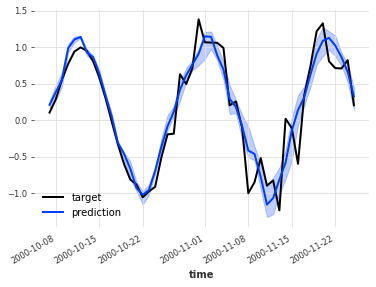

In [ ]:
pred = rnn_model.predict(50 , num_samples = 50)
target_val.slice_intersect(pred).plot(label = 'target')
pred.plot(label = 'prediction' , low_quantile= 0.1 , high_quantile = 0.9)